In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Clean.csv
/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Norm.csv


In [2]:
# importing Libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Reading our dataset to a variable.
df=pd.read_csv('/kaggle/input/evs-one-electric-vehicle-dataset/ElectricCarData_Clean.csv')

In [4]:
#Using Head Function for viewing all the first few rows of our data
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df.isna().sum()
#This line of Code is to check whether there is any nan Values or Not.

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [6]:
#Now there is no Nan values as we can see every values are 0.
#Now we check if the data contains Skeweness or Not.
num_data= df.select_dtypes(include=['number'])
num_data.skew()

AccelSec           1.245309
TopSpeed_KmH       1.899833
Range_Km           1.378960
Efficiency_WhKm    0.871567
Seats             -0.024949
PriceEuro          2.221931
dtype: float64

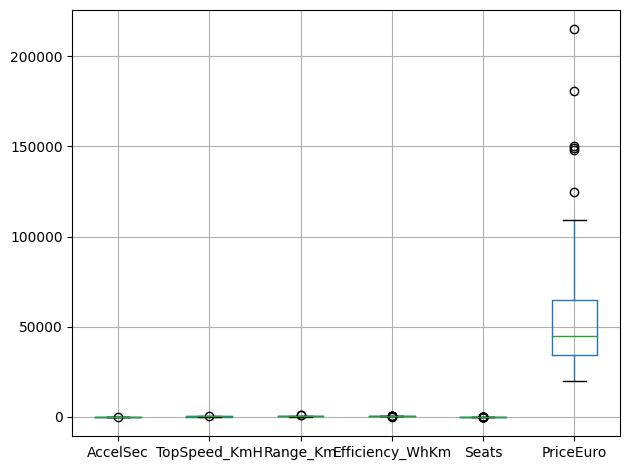

In [7]:
# Since there is no severe skewness, we can move forward -> Test For Outliers
# Using Boxplot we Check for Outliers.
df.boxplot()
plt.tight_layout()
plt.show()

In [8]:
# Since PriceEuro is Having outliers, we are trying to remove it Using Capping Method.
q1=df['PriceEuro'].quantile(0.25)
q3=df['PriceEuro'].quantile(0.75)
 
IQR=q3-q1  # Finding Inter-Quartile-Range
lower_lmt=q1 - (1.5*IQR)
upper_lmt=q3 + (1.5*IQR)

df['PriceEuro'] = pd.DataFrame(np.where(df['PriceEuro'] > upper_lmt, upper_lmt, 
     (np.where(df['PriceEuro'] < lower_lmt, lower_lmt, df['PriceEuro']))), columns=['PriceEuro'])

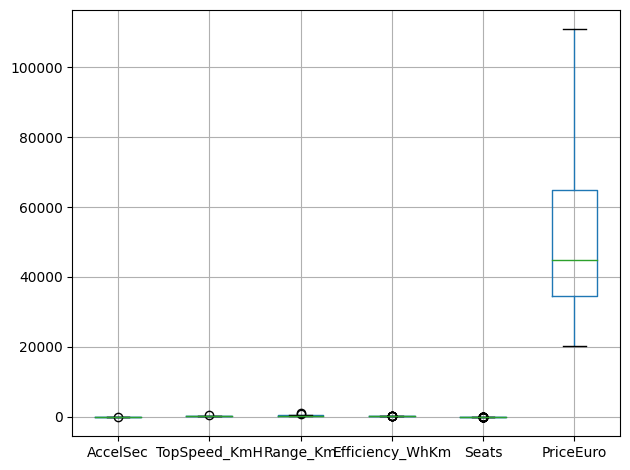

In [9]:
# Using BoxPLot for checking is there any outliers remaining
df.boxplot()
plt.tight_layout()
plt.show()

In [10]:
# So No outliers are there, Now we are checking the correlation between each features

correlation= num_data.corr(method='pearson')
correlation

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000


In [11]:
# Now as our Data is clean we are moving forward to our Tasks Given.

# First Task: Which car has the fastest 0-100 acceleration?
# So we need to sort the accelaration Coloumns according to Accelarations in Seconds.

acceleration_sorted_df= df.sort_values(by='AccelSec', ascending=True)

In [12]:
# Answer of First Task.
"""
when looking for the car with the fastest 0-100 acceleration,
you are looking for the car with the smallest acceleration time in seconds.
A smaller acceleration time indicates that the car can reach 100 km/h faster.
"""
acceleration_sorted_df.iloc[0]

Brand                  Tesla 
Model               Roadster 
AccelSec                  2.1
TopSpeed_KmH              410
Range_Km                  970
Efficiency_WhKm           206
FastCharge_KmH            920
RapidCharge               Yes
PowerTrain                AWD
PlugType           Type 2 CCS
BodyStyle              Cabrio
Segment                     S
Seats                       4
PriceEuro           110855.75
Name: 51, dtype: object

In [13]:
# Task02: Which has the highest efficiency?
# For Finding the highest efficiency vehicle, we need to sort the efficiency column in Descending order and take the First element.

efficiency_sorted_df= df.sort_values(by='Efficiency_WhKm', ascending=False)
efficiency_sorted_df.iloc[0]   # Here we'll get the answer of second Question.

Brand                 Mercedes 
Model              EQV 300 Long
AccelSec                   10.0
TopSpeed_KmH                140
Range_Km                    330
Efficiency_WhKm             273
FastCharge_KmH              290
RapidCharge                 Yes
PowerTrain                  FWD
PlugType             Type 2 CCS
BodyStyle                   SPV
Segment                       N
Seats                         7
PriceEuro               70631.0
Name: 84, dtype: object

In [14]:
# TASK03: Does a difference in power train effect the range, top speed, efficiency?
# For Finding this, we are using 'groupby' to group all the 3 values which comes under PowerTrain Column.
# First We are Taking the mean of the Range of all 3 Categories.

average_range_by_powertrain = df.groupby('PowerTrain')['Range_Km'].mean()
print(average_range_by_powertrain)

PowerTrain
AWD    426.463415
FWD    268.243243
RWD    299.400000
Name: Range_Km, dtype: float64


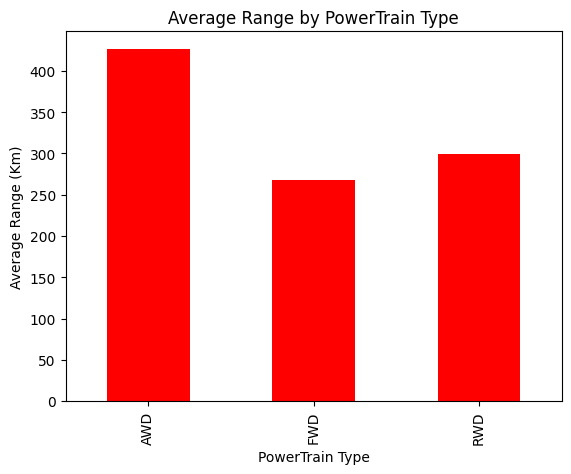

In [15]:
# Plotting the mean of each 3 categories For doing that we are using, 'MatplotLib' Library.

average_range_by_powertrain.plot(kind='bar', color='red') #Assigning the 'red' colour
plt.title('Average Range by PowerTrain Type')
plt.xlabel('PowerTrain Type')
plt.ylabel('Average Range (Km)')
plt.show()

In [16]:
# Doing the same here in case of Topspeed
average_speed_by_powertrain = df.groupby('PowerTrain')['TopSpeed_KmH'].mean()
print(average_speed_by_powertrain)

PowerTrain
AWD    216.902439
FWD    148.756757
RWD    162.400000
Name: TopSpeed_KmH, dtype: float64


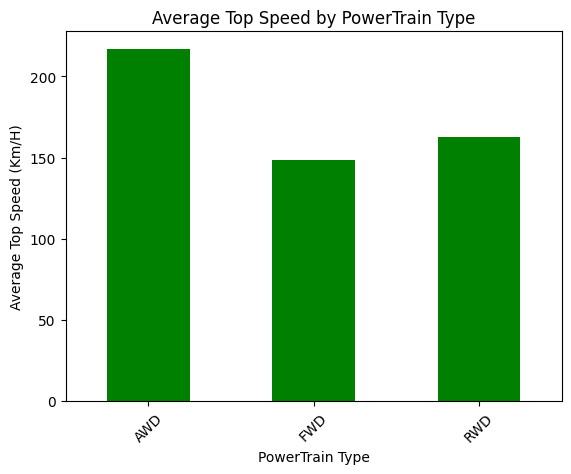

In [17]:
# Plotting the above speed mean - so we can understand the relation between powertrain and Speed
average_speed_by_powertrain.plot(kind='bar', color='green')
plt.title('Average Top Speed by PowerTrain Type')
plt.xlabel('PowerTrain Type')
plt.ylabel('Average Top Speed (Km/H)')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Doing the same here in case of Efficiency
average_efficiency_by_powertrain = df.groupby('PowerTrain')['Efficiency_WhKm'].mean()
print(average_efficiency_by_powertrain)

PowerTrain
AWD    206.756098
FWD    175.567568
RWD    180.440000
Name: Efficiency_WhKm, dtype: float64


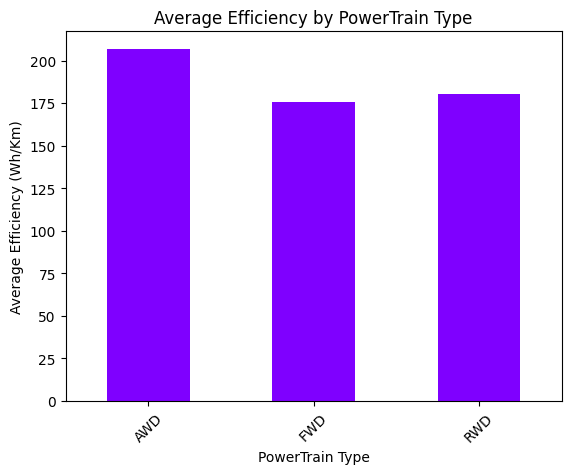

In [19]:
# Plotting the above Efficiency mean - so we can understand the relation between powertrain and Efficiency
average_efficiency_by_powertrain.plot(kind='bar', color='#7f00ff')
plt.title('Average Efficiency by PowerTrain Type')
plt.xlabel('PowerTrain Type')
plt.ylabel('Average Efficiency (Wh/Km)')
plt.xticks(rotation=45)
plt.show()

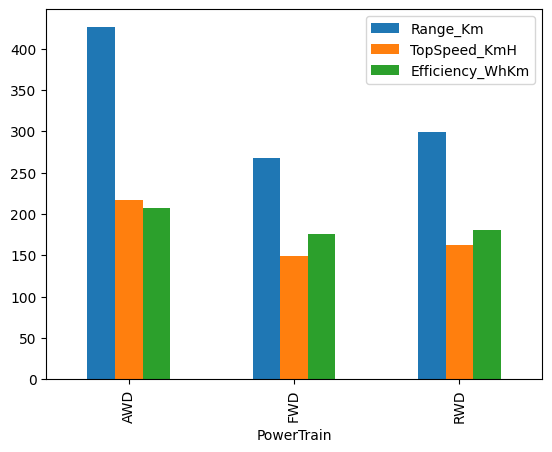

In [20]:
# SHowing all those three in one graph. So we can understand it easily.
grouped = df.groupby('PowerTrain')

# Calculate mean values for Range_Km, TopSpeed_KmH, Efficiency_WhKm for each PowerTrain type
mean_values = grouped[['Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm']].mean()

mean_values.plot(kind='bar')
plt.show()

In [21]:
# Printing the Changes in powertrain values and their mean of Range, Topspeed and Efficiency respectively.
print(mean_values)

              Range_Km  TopSpeed_KmH  Efficiency_WhKm
PowerTrain                                           
AWD         426.463415    216.902439       206.756098
FWD         268.243243    148.756757       175.567568
RWD         299.400000    162.400000       180.440000


In [22]:
# TASK04: Which manufacturer has the most number of vehicles?
total_brand_counts= df['Brand'].value_counts()
# Using the above code we'll get the count of all the unique Brands.

In [23]:
# Print the row with, Brand which Contains the Highest Number using - total_brand_counts.idxmax()
print("Manufacturer with the most number of vehicles:", total_brand_counts.idxmax())

Manufacturer with the most number of vehicles: Tesla 


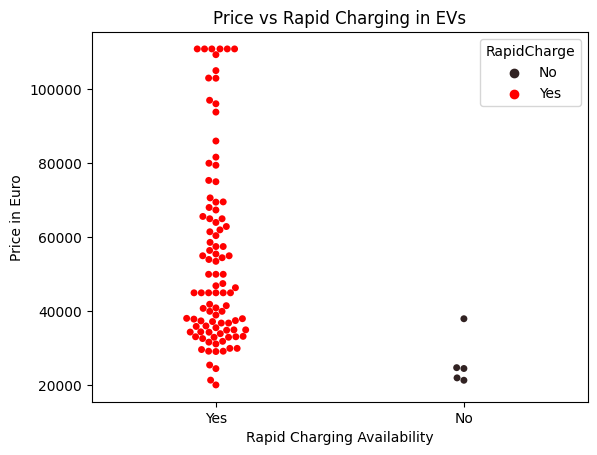

In [24]:
# TASK05: How does price relate to rapid charging?
# We plot these two for getting the relation.

sns.swarmplot(x=df['RapidCharge'], y=df['PriceEuro'], data=df, hue='RapidCharge', palette='dark:r', hue_order=["No", "Yes"])
# We are using Swarm plot here  because multiple values do overlap if we plot it using 'scatter', In Swarmplot the datapoints wont overlap.
plt.xlabel('Rapid Charging Availability')
plt.ylabel('Price in Euro')
plt.title('Price vs Rapid Charging in EVs')
plt.show()

In [25]:
# LINEAR REGRESSION 
# There are '-' values in FastCharge coloumn 
df.loc[df['FastCharge_KmH']=='-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790.0
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000.0
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030.0
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387.0
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565.0


In [26]:
# We will drop those Values so that we can get the Clear one(Cleaning Them).
df2=df.drop(index=[57,68,77,82,91],axis=1)

In [27]:
# Checking Whether those values are gone or not.
df2.loc[df['FastCharge_KmH']=='-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro


In [28]:
# we can see in the above output those '-' datas are gone.
# Now, Set the 'Features' and 'Target' for our Linear Regression Model.
X = df2[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm','FastCharge_KmH', 'Seats']]
y = df2['PriceEuro']

In [29]:
# Using train_test_split for splitting our dataset into train and test datasets.
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)  #20 percent of our dataset will be used as Testing Dataset.
model= LinearRegression()  # Create our model

In [30]:
# Training our model using Training Dataset
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Making predictions using Testing set
predictions = model.predict(X_test)

In [32]:
# Calculate and print the model performance metrics (Finding 'Mean Squared Error' and 'R-Squared' values)
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Mean Squared Error: 143254316.91752142
R-squared: 0.7948301157446107


In [33]:
# Coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-1589.34407793   245.42547407    27.85405345   136.73797477
     6.80130803 -1181.69172939]
Intercept: -12575.097646297945


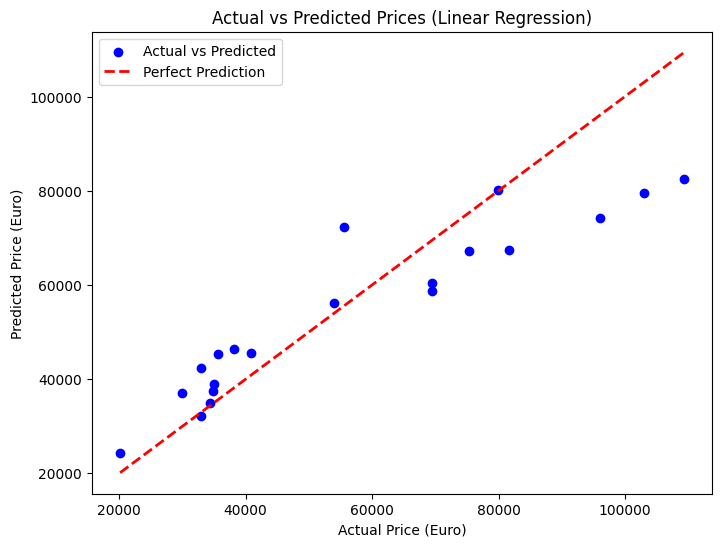

In [34]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Price (Euro)')
plt.ylabel('Predicted Price (Euro)')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.legend()
plt.show()